In [40]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')[['Growth','Weight','Hair length','Children number','Sex']].dropna()
df_test=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')[['Growth','Weight','Hair length','Children number','Sex']].dropna()

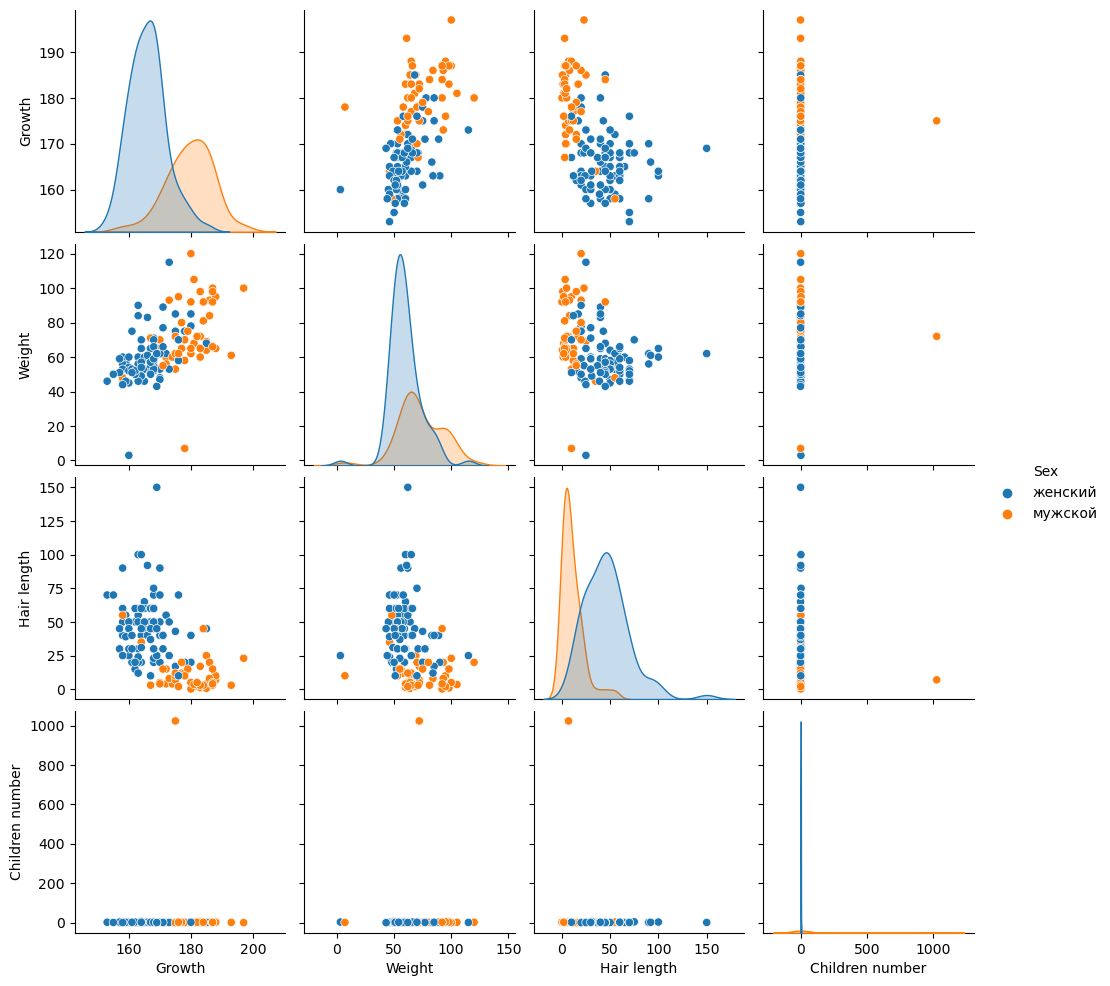

In [41]:
sns.pairplot(df,hue='Sex')

In [42]:
model1=RandomForestClassifier(max_depth=2,random_state=0)
model1.fit(df[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4),df['Sex'].values)


RandomForestClassifier(max_depth=2, random_state=0)

In [43]:
df_test['Predicted']=model1.predict(df_test[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4))
pd.crosstab(df_test['Predicted'],df_test['Sex'])

Sex,женский,мужской
Predicted,,
женский,42,1
мужской,0,25


In [44]:
precision_recall_fscore_support(df_test['Predicted'],df_test['Sex'])

(array([1.        , 0.96153846]),
 array([0.97674419, 1.        ]),
 array([0.98823529, 0.98039216]),
 array([43, 25], dtype=int64))

In [45]:
df_test.head()

,Growth,Weight,Hair length,Children number,Sex,Predicted
0,180.0,78.0,1.2,2.0,мужской,мужской
1,167.0,50.0,30.0,2.0,женский,женский
3,156.0,47.0,20.0,2.0,женский,женский
5,150.0,40.0,30.0,2.0,женский,женский
7,183.0,80.0,2.0,0.0,мужской,мужской


<AxesSubplot: xlabel='Weight', ylabel='Growth'>

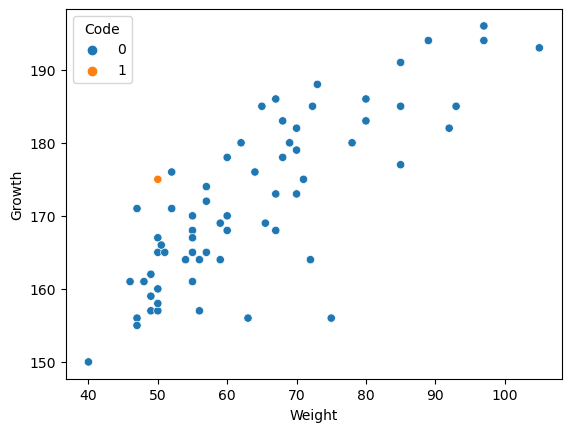

In [46]:
df_test['Code']=0
df_test.loc[(df_test['Predicted']=='мужской')&(df_test['Sex']=='женский'),'Code']=2
df_test.loc[(df_test['Predicted']=='женский')&(df_test['Sex']=='мужской'),'Code']=1
sns.scatterplot(data=df_test,x=df_test['Weight'],y=df_test['Growth'],hue='Code')

In [47]:
df_test[df_test['Predicted']!=df_test['Sex']]

,Growth,Weight,Hair length,Children number,Sex,Predicted,Code
78,175.0,50.0,40.0,2.0,мужской,женский,1


# Задание 1
## На случайный лес
Будем предсказывать институт, где учится студент (признак "Your unstitute") по баллам, на которые он написал ЕГЭ. Баллы за ЕГЭ занимают в нашей таблице столбцы с номерами 6-16. Чтобы из исходной таблицы выбрать только указанные столбцы нужно выполнить команду df_test.iloc[:,6:17] - это и будет таблица, в которой остались только столбцы с результатами ЕГЭ.

Натренируйте модель RandomForestClassifier(max_depth=4, random_state=0) для предсказания признака "Your unstitute" и запустите ее на тестовой выборке student_test.csv

В окошко ответа запишите количество экономистов, которые были детектированы алгоритмом как математики.

In [160]:
df_new=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')
df_test_new=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')
df_test_new.columns

# df_new=df_new[['Russian rating', 'Maths rating', 'Physics rating',
#        'Computer science rating', 'Chemistry rating', 'Literature rating',
#       'History rating', 'Geography rating', 'Biology rating',
#       'Foreign language rating', 'Social science rating','Your insitute']]
df_new_cut = df_new.iloc[:,6:17]
df_new_cut['Your institute']=df_new['Your insitute']

df_test_new_cut = df_test_new.iloc[:,6:17]
df_test_new_cut['Your institute']=df_test_new['Your insitute']

modelRandomeForest=RandomForestClassifier(random_state=0)

modelRandomeForest.fit(df_new.iloc[:,6:17].values.reshape(-1,11),df_new_cut['Your institute'].values)

df_test_new_cut['Predicted institute']=modelRandomeForest.predict(df_test_new.iloc[:,6:17].values.reshape(-1,11))
sum((df_test_new_cut['Predicted institute']=='Математический и ИТ')&(df_test_new_cut['Your institute']=='Экономический'))

8

# Градиентный бустинг!!!!!

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
modelGradientBoost=GradientBoostingClassifier(random_state=0)
modelGradientBoost.fit(df[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4),df['Sex'].values)
df_test['PredictedGradientBoost']=modelGradientBoost.predict(df_test[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4))
pd.crosstab(df_test['PredictedGradientBoost'],df_test['Sex'])

Sex,женский,мужской
PredictedGradientBoost,,
женский,42,1
мужской,0,25


In [67]:
precision_recall_fscore_support(df_test['Sex'],df_test['PredictedGradientBoost'])

(array([0.97674419, 1.        ]),
 array([1.        , 0.96153846]),
 array([0.98823529, 0.98039216]),
 array([42, 26], dtype=int64))

In [ ]:
(array([1.        , 0.96153846]),
 array([0.97674419, 1.        ]),
 array([0.98823529, 0.98039216]),
 array([43, 25], dtype=int64))